<h1>Extracting and Visualizing Stock Data</h1>


In [11]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

## Define Graphing Function


In [321]:
def make_graph(stock_data, revenue_data, stock):
    # Convert dates without using 'infer_datetime_format' since it's no longer needed
    stock_data['Date'] = pd.to_datetime(stock_data['Date'])
    revenue_data['Date'] = pd.to_datetime(revenue_data['Date'])
    
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, 
                        subplot_titles=("Historical Share Price", "Historical Revenue"), 
                        vertical_spacing=.3)
    
    fig.add_trace(go.Scatter(x=stock_data['Date'], 
                             y=stock_data['Close'].astype("float"), 
                             name="Share Price"), 
                  row=1, col=1)
    
    fig.add_trace(go.Scatter(x=revenue_data['Date'], 
                             y=revenue_data['Revenue'].astype("float"), 
                             name="Revenue"), 
                  row=2, col=1)
    
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    
    fig.update_layout(showlegend=False,
                      height=900,
                      title=stock,
                      xaxis_rangeslider_visible=True)
    
    fig.show()

## Using yfinance to Extract Stock Data


In [164]:
rivian= yf.Ticker("RIVN")

In [166]:
rivian_data= rivian.history(period="max")
rivian_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-11-10 00:00:00-05:00,106.750000,119.459999,95.199997,100.730003,103679500,0.0,0.0
2021-11-11 00:00:00-05:00,114.625000,125.000000,108.010002,122.989998,83668200,0.0,0.0
2021-11-12 00:00:00-05:00,128.645004,135.199997,125.250000,129.949997,50636800,0.0,0.0
2021-11-15 00:00:00-05:00,130.800003,152.529999,127.510002,149.360001,64982300,0.0,0.0
2021-11-16 00:00:00-05:00,163.800003,179.470001,153.779999,172.009995,94036600,0.0,0.0
...,...,...,...,...,...,...,...
2024-08-16 00:00:00-04:00,13.550000,13.770000,13.010000,13.210000,37750200,0.0,0.0
2024-08-19 00:00:00-04:00,13.330000,13.590000,13.140000,13.530000,21051300,0.0,0.0
2024-08-20 00:00:00-04:00,13.490000,13.690000,13.190000,13.200000,23709800,0.0,0.0


In [225]:
rivian_data.reset_index(inplace=True)
rivian_data.head(5)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2021-11-10 00:00:00-05:00,106.750000,119.459999,95.199997,100.730003,103679500,0.0,0.0
1,2021-11-11 00:00:00-05:00,114.625000,125.000000,108.010002,122.989998,83668200,0.0,0.0
2,2021-11-12 00:00:00-05:00,128.645004,135.199997,125.250000,129.949997,50636800,0.0,0.0
3,2021-11-15 00:00:00-05:00,130.800003,152.529999,127.510002,149.360001,64982300,0.0,0.0
4,2021-11-16 00:00:00-05:00,163.800003,179.470001,153.779999,172.009995,94036600,0.0,0.0


## Using Webscraping to Extract Rivian Revenue Data


In [227]:


# Define the URL
url = "https://www.macrotrends.net/stocks/charts/RIVN/rivian-automotive/revenue"

# Add headers to mimic a browser visit
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3"
}

# Fetch the HTML data
response = requests.get(url, headers=headers)
html_data = response.text

# Parse the HTML data using BeautifulSoup
soup = BeautifulSoup(html_data, "html5lib")

# Find the table containing Rivian Quarterly Revenue data
rivian_revenue = pd.read_html(str(soup), match="Rivian Automotive Quarterly Revenue", flavor='bs4')[0]

In [228]:
rivian_revenue.rename(columns={"Rivian Automotive Quarterly Revenue (Millions of US $)":"Date","Rivian Automotive Quarterly Revenue (Millions of US $).1":"Revenue"}, inplace=True)

In [231]:
rivian_revenue.head()

,Date,Revenue
0,2024-06-30,"$1,158"
1,2024-03-31,"$1,204"
2,2023-12-31,"$1,315"
3,2023-09-30,"$1,337"
4,2023-06-30,"$1,121"


In [233]:
rivian_revenue["Revenue"] = rivian_revenue["Revenue"].str.replace("$", "").str.replace(",", "")

In [235]:
rivian_revenue.dropna(inplace=True)

In [237]:
rivian_revenue.tail()

,Date,Revenue
7,2022-09-30,536
8,2022-06-30,364
9,2022-03-31,95
10,2021-12-31,54
11,2021-09-30,1


## Using yfinance to Extract Stock Data


In [242]:
Nio= yf.Ticker("NIO")

In [246]:
nio_data= Nio.history(period="max")
nio_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-09-12 00:00:00-04:00,6.00,6.93,5.35,6.60,66849000,0.0,0.0
2018-09-13 00:00:00-04:00,6.62,12.69,6.52,11.60,158346500,0.0,0.0
2018-09-14 00:00:00-04:00,12.66,13.80,9.22,9.90,172473600,0.0,0.0
2018-09-17 00:00:00-04:00,9.61,9.75,8.50,8.50,56323900,0.0,0.0
2018-09-18 00:00:00-04:00,8.73,9.10,7.67,7.68,41827600,0.0,0.0


In [307]:
nio_data.reset_index(inplace=True)

In [309]:
nio_data.head(5)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2018-09-12 00:00:00-04:00,6.00,6.93,5.35,6.60,66849000,0.0,0.0
1,2018-09-13 00:00:00-04:00,6.62,12.69,6.52,11.60,158346500,0.0,0.0
2,2018-09-14 00:00:00-04:00,12.66,13.80,9.22,9.90,172473600,0.0,0.0
3,2018-09-17 00:00:00-04:00,9.61,9.75,8.50,8.50,56323900,0.0,0.0
4,2018-09-18 00:00:00-04:00,8.73,9.10,7.67,7.68,41827600,0.0,0.0


## Using Webscraping to Extract Nio Revenue Data


In [282]:
# Define the URL
url = "https://www.macrotrends.net/stocks/charts/nio/nio/revenue"

# Add headers to mimic a browser visit
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3"
}

# Fetch the HTML data
response = requests.get(url, headers=headers)
html_data = response.text

# Parse the HTML data using BeautifulSoup
soup = BeautifulSoup(html_data, "html5lib")

# Find the table containing Rivian Quarterly Revenue data
nio_revenue = pd.read_html(str(soup), match="NIO Quarterly Revenue", flavor='bs4')[0]

In [290]:
nio_revenue.rename(columns={"NIO Quarterly Revenue (Millions of US $)":"Date","NIO Quarterly Revenue (Millions of US $).1":"Revenue"}, inplace=True)

In [292]:
nio_revenue["Revenue"] = nio_revenue["Revenue"].str.replace("$", "").str.replace(",", "")

In [296]:
nio_revenue.tail()

,Date,Revenue
17,2019-12-31,404
18,2019-09-30,257
19,2019-06-30,220
20,2019-03-31,243
21,2018-09-30,214


## Plotting Rivian Stock Graph


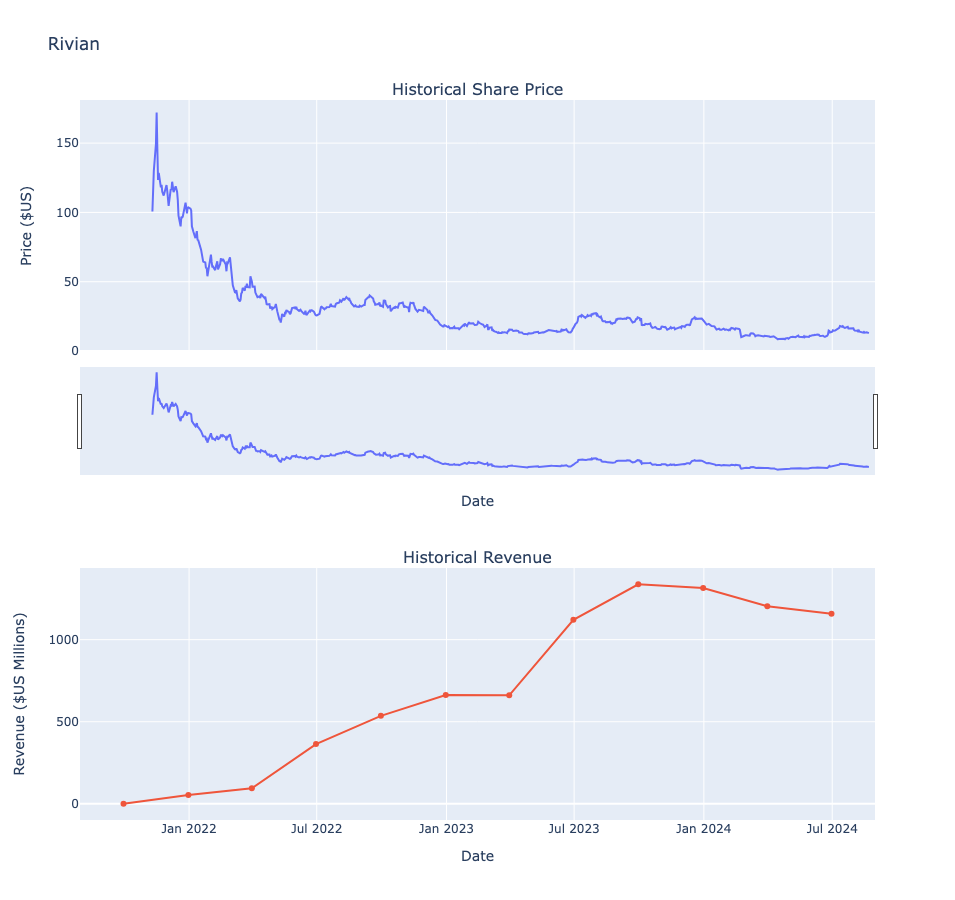

In [323]:
rivian_graph= make_graph(rivian_data, rivian_revenue, 'Rivian')

## Plotting NIO Stock Graph


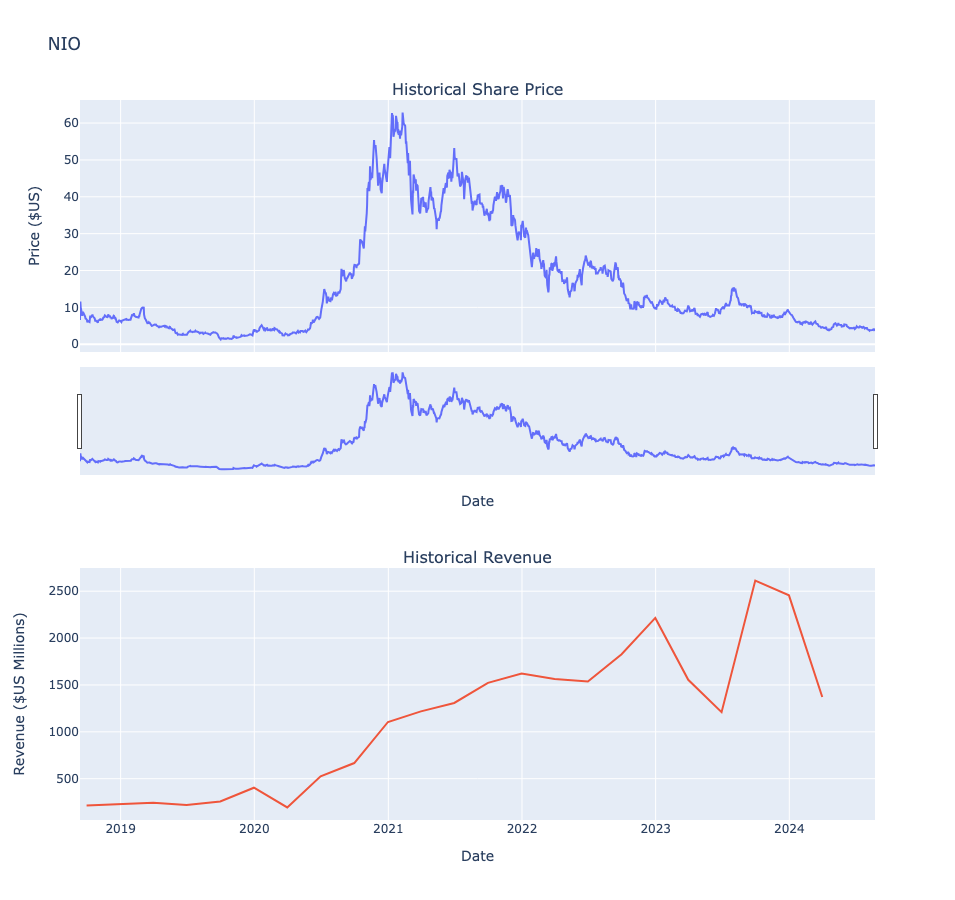

In [325]:
nio_graph= make_graph(nio_data, nio_revenue, 'NIO')